# CPU's and GPU's chips
## Análisis exploratorio de datos (EDA) 

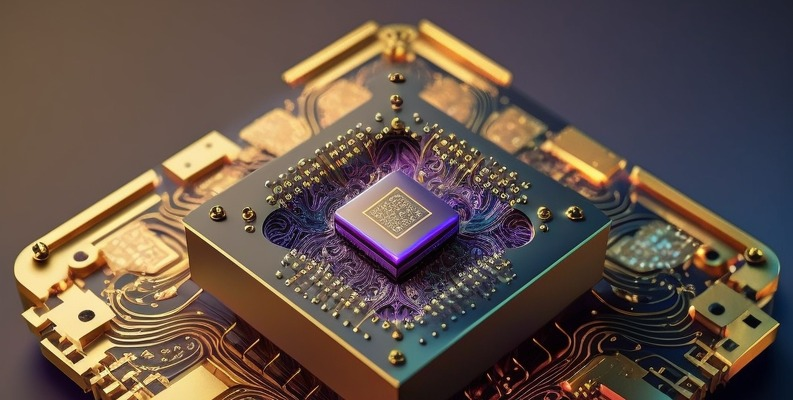


In [498]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [499]:
# Cargar datos y primer vistazo
df = pd.read_csv('chip_dataset.csv', index_col=0, ) # index_col=0 para que no se cargue la columna de indices
df.head(5)

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


#### Significado de las columnas

- **Product**: Nombre del producto
- **Type**: Tipo de producto (CPU o GPU)
- **Relase_date**: Fecha de lanzamiento del chip
- **Process Size(nm)**: Tamaño del proceso de fabricación en nanómetros
- **TDP(W)**: Potencia de diseño térmico (Thermal Design Power)
- **Die Size(mm^2)**: Tamaño del chip en milímetros cuadrados
- **Transistors(million)**: Número de transistores en millones
- **Freq(Mhz)**: Frecuencia de reloj en Megahercios
- **Foundry**: Fabricante del chip
- **Vendor**: Vendedor del chip
- **FP16 GFLOPS**: Rendimiento de coma flotante de 16 bits en operaciones de punto flotante por segundo
- **FP32 GFLOPS**: Rendimiento de coma flotante de 32 bits en operaciones de punto flotante por segundo
- **FP64 GFLOPS**: Rendimiento de coma flotante de 64 bits en operaciones de punto flotante por segundo


In [500]:
# Cantidad de registros y columnas
rows, columns = df.shape
print(f'Cantidad de registros: {rows}')
print(f'Cantidad de columnas: {columns}\n')

print('Columnas')
print(df.columns)

Cantidad de registros: 4854
Cantidad de columnas: 13

Columnas
Index(['Product', 'Type', 'Release Date', 'Process Size (nm)', 'TDP (W)',
       'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)', 'Foundry',
       'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')


In [501]:
# Renombrar columnas para fácil acceso
df.rename(columns={'Product':'product', 
                   'Type':'type', 
                   'Release Date': 'release_date', 
                   'Process Size (nm)':'process_size',
                   'TDP (W)':'tdp',
                   'Die Size (mm^2)':'die_size',
                   'Transistors (million)':'transistors',
                   'Freq (MHz)':'freq',
                   'Foundry':'foundry',
                   'Vendor':'vendor',}, inplace=True)
df.head(5)

,product,type,release_date,process_size,tdp,die_size,transistors,freq,foundry,vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [502]:
# LLevar a nulos reales, en especial para la columna de foundry el valor Unknow

na_values = ['Unknown', 'unknown', 'N/A', 'NaN', 'nan', '', ' ']
df.replace(na_values, np.nan, inplace=True)
df.head(5)

,product,type,release_date,process_size,tdp,die_size,transistors,freq,foundry,vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,NaN,AMD,NaN,NaN,NaN
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,NaN,AMD,NaN,NaN,NaN


GPU    2662
CPU    2192
Name: type, dtype: int64


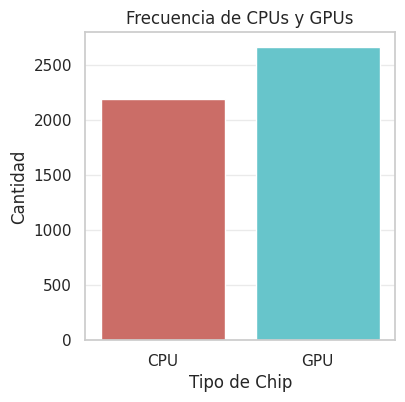

In [503]:
# Gráfico de frecuencias de la cantidad de CPUs o GPUs en el set de datos

count = df['type'].value_counts()
print(count)
sns.countplot(x='type', data=df, palette='hls')

#Establecer tamaño de gráfico
plt.rcParams['figure.figsize'] = (4, 4)

plt.title('Frecuencia de CPUs y GPUs')
plt.xlabel('Tipo de Chip')
plt.ylabel('Cantidad')
plt.show()

#### Valores nulos en el dataset

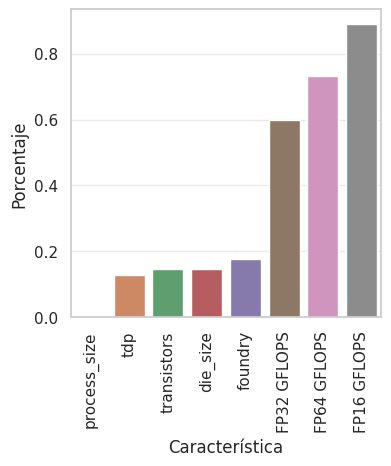

Cantidad de valores nulos:
 product            0
type               0
release_date       0
process_size       9
tdp              626
die_size         715
transistors      711
freq               0
foundry          866
vendor             0
FP16 GFLOPS     4318
FP32 GFLOPS     2906
FP64 GFLOPS     3548
dtype: int64


In [504]:

miss = df.isnull().sum()/len(df) # Porcentaje de valores nulos
miss = miss[miss > 0] # Filtrar valores nulos
miss.sort_values(inplace=True) # Ordenar valores nulos

miss = miss.to_frame() # Convertir a dataframe 
miss.columns = ['Porcentaje'] # Renombrar columna
miss.index.names = ['Nombre'] #Renombramos el indice
miss['Característica'] = miss.index #Creamos una nueva columna con los nombres de las columnas

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Característica', y = 'Porcentaje', data=miss)
plt.xticks(rotation = 90)
plt.show()

print(f'Cantidad de valores nulos:\n {df.isnull().sum()}')

### Aspectos a destacar:
- Las columnas TDP, Transistors y Die Size tienen alredeodor de un 17% de valores nulos, se evaluará si se pueden **imputar** o no.
- Las columnas asociadas a Rendimiento de coma flotante (FP) tienen más del 60% de valores nulos, por lo que **no serán consideradas** en el análisis.

In [505]:
# Eliminar columnas con valores nulos en exceso.

#WARNING -> Cuidado con esta ejecucion, elimina las 3 ultimas columnas del dataset
df.drop(df.columns[-3:], axis=1, inplace=True) # Eliminar columnas con valores nulos

df.sample()

,product,type,release_date,process_size,tdp,die_size,transistors,freq,foundry,vendor
1323,Intel Pentium 4 HT 670,CPU,2005-05-26,90.0,84.0,109.0,169.0,3800.0,Intel,Intel


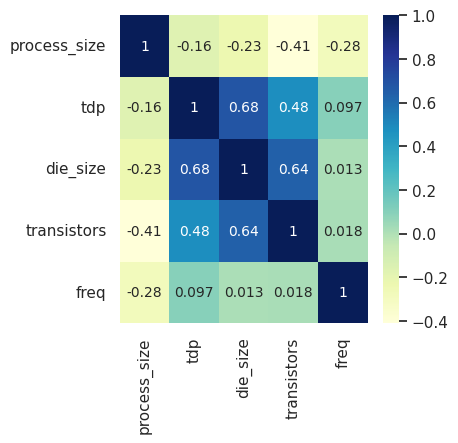

In [506]:
# Ver correlacion entre las variables continuas

corr = df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':10}, annot=True)
plt.show()  

<Axes: xlabel='die_size', ylabel='tdp'>

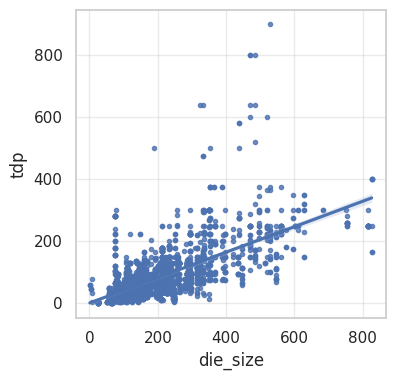

In [507]:
# Correlación entre Die Size y TDP

sns.regplot(x='die_size', y='tdp', data=df, color='b', marker='.')

### 

Datos eliminados: 649
Nueva correlación: 0.7141286341105297
No vale la pena eliminar 649 datos para tratar de predecir 626 y mejorar muy poco la correlación


<Axes: xlabel='die_size', ylabel='tdp'>

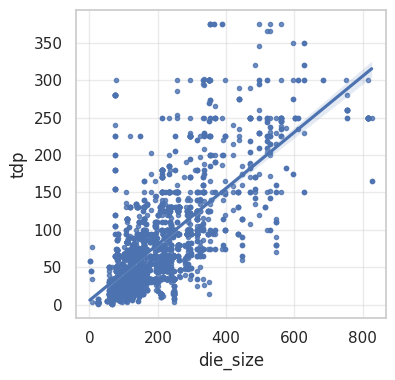

In [508]:
# TDP es buen candidato para imputar por regresión lineal con Die Size
# Eliminamos los datos que tengan un TDP mayor a 400W (outliers)

deleted = df[df['tdp'] < 400]
datos_eliminados = df.shape[0] - deleted.shape[0] # Cantidad de datos eliminados
print(f'Datos eliminados: {datos_eliminados}')
print(f'Nueva correlación: {deleted.corr().loc["die_size", "tdp"]}')
print(f'No vale la pena eliminar 649 datos para tratar de predecir 626 y mejorar muy poco la correlación')

sns.regplot(x='die_size', y='tdp', data=deleted, color='b', marker='.')

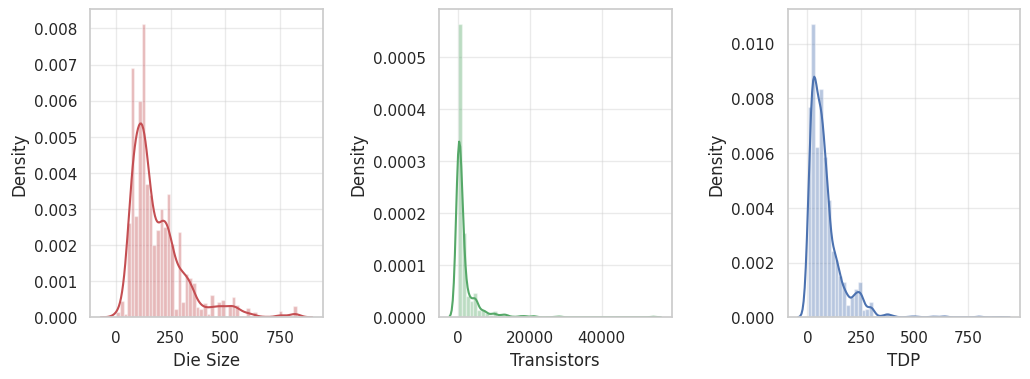

In [509]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con una cuadrícula de 1x3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Graficar la distribución de Die Size en el primer subplot
sns.distplot(df['die_size'], color='r', label='Die Size', ax=axes[0])
axes[0].set_xlabel('Die Size')

# Graficar la distribución de Transistors en el segundo subplot
sns.distplot(df['transistors'], color='g', label='Transistors', ax=axes[1])
axes[1].set_xlabel('Transistors')

# Graficar la distribución de TDP en el tercer subplot
sns.distplot(df['tdp'], color='b', label='TDP', ax=axes[2])
axes[2].set_xlabel('TDP')

# Ajustar el espacio entre los subplots
plt.subplots_adjust(wspace=0.5)

# Mostrar el gráfico
plt.show()


In [510]:
# Imputar valores nulos de Die Size por la media, mejor candidato para este tipo de imputación.
df['die_size'].fillna(df['die_size'].mean(), inplace=True)

# Comprobar si se imputaron los valores nulos
print(f'Cantidad de valores nulos Die Size:\n {df.die_size.isnull().sum()}')

Cantidad de valores nulos Die Size:
 0


In [511]:
from sklearn.linear_model import LinearRegression

def imputar_con_regresion(df, x_var, y_var):
    # Separar los datos en dos grupos, con y sin valores nulos en y_var
    df_con = df[df[y_var].notnull()]
    df_sin = df[df[y_var].isnull()]

    # Separar los datos en X e y
    X_train = df_con[x_var].values.reshape(-1,1) # reshape(-1,1) para convertirlo en un vector columna
    y_train = df_con[y_var].values.reshape(-1,1) # 

    X_test = df_sin[x_var].values.reshape(-1,1)

    # Crear el modelo de regresión lineal
    reg = LinearRegression()

    # Entrenar el modelo con los datos de entrenamiento
    reg.fit(X_train, y_train)

    # Predecir los valores de y_var con los datos de prueba
    y_test = reg.predict(X_test)

    # Imputar los valores de y_var en el dataset original
    df.loc[df[y_var].isnull(), y_var] = y_test

    # Comprobar si se imputaron los valores nulos
    print(f'Cantidad de valores nulos en {y_var}:\n {df[y_var].isnull().sum()}')
    
    return df

# Imputar valores nulos de TDP por regresión lineal con Die Size
df = imputar_con_regresion(df, 'die_size', 'tdp')

# Imputar valores nulos de Transistors por regresión lineal con Die Size
df = imputar_con_regresion(df, 'die_size', 'transistors')


Cantidad de valores nulos en tdp:
 0
Cantidad de valores nulos en transistors:
 0


In [512]:
# One Hot Encoding para la variable type

df = pd.get_dummies(df, columns=['type'], prefix='type')

#Movemos las columnas type_gpu y type_cpu al principio del dataframe
type_gpu = df.pop('type_GPU')
df.insert(0, 'type_GPU', type_gpu)

type_cpu = df.pop('type_CPU')
df.insert(0, 'type_CPU', type_cpu)

df.head()

,type_CPU,type_GPU,product,release_date,process_size,tdp,die_size,transistors,freq,foundry,vendor
0,1,0,AMD Athlon 64 3500+,2007-02-20,65.0,45.0,77.000000,122.000000,2200.0,NaN,AMD
1,1,0,AMD Athlon 200GE,2018-09-06,14.0,35.0,192.000000,4800.000000,3200.0,NaN,AMD
2,1,0,Intel Core i5-1145G7,2020-09-02,10.0,28.0,188.440445,1885.735928,2600.0,Intel,Intel
3,1,0,Intel Xeon E5-2603 v2,2013-09-01,22.0,80.0,160.000000,1400.000000,1800.0,Intel,Intel
4,1,0,AMD Phenom II X4 980 BE,2011-05-03,45.0,125.0,258.000000,758.000000,3700.0,NaN,AMD
